In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('./Data/Beijing.csv')

In [3]:
data

,year,month,day,hour,PM2.5,PM10,SO2,NO2,O3,CO,TEMP,PRES,RAIN,HUMI,DEWP,WD,WS
0,2014,1,1,0,31.0,117.0,15.0,73.0,NaN,NaN,-0.4,1009.1,0.0,34.0,-14.4,NW,1.2
1,2014,1,1,1,58.0,154.0,39.0,84.0,4.0,1.5,-1.1,1008.8,0.0,40.0,-13.0,NW,1.2
2,2014,1,1,2,68.0,162.0,39.0,85.0,4.0,1.7,-1.4,1008.8,0.0,41.0,-13.0,SW,0.7
3,2014,1,1,3,83.0,189.0,63.0,83.0,5.0,1.7,-2.4,1008.2,0.0,46.0,-12.5,SE,0.6
4,2014,1,1,4,75.0,190.0,55.0,83.0,3.0,2.1,-2.5,1008.0,0.0,46.0,-12.6,CV,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2015,12,31,19,112.0,112.0,28.0,114.0,23.0,2.3,-1.4,1026.3,0.0,58.0,-8.6,SE,1.0
17516,2015,12,31,20,122.0,132.0,27.0,118.0,26.0,3.2,-2.5,1026.2,0.0,64.0,-8.4,SE,1.3
17517,2015,12,31,21,149.0,179.0,30.0,125.0,31.0,4.5,-2.7,1025.8,0.0,67.0,-8.0,NE,0.9
17518,2015,12,31,22,196.0,230.0,29.0,130.0,33.0,4.6,-3.5,1025.5,0.0,73.0,-7.6,CV,0.4


In [4]:
data.isna().sum()

year       0
month      0
day        0
hour       0
PM2.5    443
PM10     308
SO2      322
NO2      456
O3       327
CO       398
TEMP       2
PRES       2
RAIN       2
HUMI       2
DEWP       2
WD         2
WS         2
dtype: int64

In [5]:
data.iloc[:,0].astype(str)+data.iloc[:,1].astype(str)+data.iloc[:,2].astype(str)

0          201411
1          201411
2          201411
3          201411
4          201411
           ...   
17515    20151231
17516    20151231
17517    20151231
17518    20151231
17519    20151231
Length: 17520, dtype: object

In [6]:
data.isna().sum()

year       0
month      0
day        0
hour       0
PM2.5    443
PM10     308
SO2      322
NO2      456
O3       327
CO       398
TEMP       2
PRES       2
RAIN       2
HUMI       2
DEWP       2
WD         2
WS         2
dtype: int64

In [7]:
data.dropna(axis=0, how='any', inplace=True)
data.isna().sum()

year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
O3       0
CO       0
TEMP     0
PRES     0
RAIN     0
HUMI     0
DEWP     0
WD       0
WS       0
dtype: int64

In [8]:
import datetime

In [9]:
data['time'] = [datetime.datetime(data.iloc[i,0],data.iloc[i,1],data.iloc[i,2],data.iloc[i,3]) for i in range(len(data))]

In [13]:
data.set_index('time',inplace=True)
data.drop(['year','month','day','hour'] ,axis = 1,inplace=True)

In [15]:
data['EWS'] = [data['WS'][i]/(2**0.5) if "E" in (data["WD"][i]) else -data['WS'][i]/(2**0.5) for i in range(len(data))]
data['NWS'] = [data['WS'][i]/(2**0.5) if "N" in (data["WD"][i]) else -data['WS'][i]/(2**0.5) for i in range(len(data))]
data['EWS'] = [0 if "CV" in (data["WD"][i]) else data['EWS'][i] for i in range(len(data))]
data['NWS'] = [0 if "CV" in (data["WD"][i]) else data['EWS'][i] for i in range(len(data))]

In [16]:
data

,PM2.5,PM10,SO2,NO2,O3,CO,TEMP,PRES,RAIN,HUMI,DEWP,WD,WS,EWS,NWS
time,,,,,,,,,,,,,,,
2014-01-01 01:00:00,58.0,154.0,39.0,84.0,4.0,1.5,-1.1,1008.8,0.0,40.0,-13.0,NW,1.2,-0.848528,-0.848528
2014-01-01 02:00:00,68.0,162.0,39.0,85.0,4.0,1.7,-1.4,1008.8,0.0,41.0,-13.0,SW,0.7,-0.494975,-0.494975
2014-01-01 03:00:00,83.0,189.0,63.0,83.0,5.0,1.7,-2.4,1008.2,0.0,46.0,-12.5,SE,0.6,0.424264,0.424264
2014-01-01 04:00:00,75.0,190.0,55.0,83.0,3.0,2.1,-2.5,1008.0,0.0,46.0,-12.6,CV,0.4,0.000000,0.000000
2014-01-01 05:00:00,83.0,189.0,49.0,84.0,6.0,2.4,-2.1,1008.3,0.0,45.0,-12.5,SE,0.5,0.353553,0.353553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00,112.0,112.0,28.0,114.0,23.0,2.3,-1.4,1026.3,0.0,58.0,-8.6,SE,1.0,0.707107,0.707107
2015-12-31 20:00:00,122.0,132.0,27.0,118.0,26.0,3.2,-2.5,1026.2,0.0,64.0,-8.4,SE,1.3,0.919239,0.919239
2015-12-31 21:00:00,149.0,179.0,30.0,125.0,31.0,4.5,-2.7,1025.8,0.0,67.0,-8.0,NE,0.9,0.636396,0.636396


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns     #seaborn画出的图更好看，且代码更简单，缺点是可塑性差
from statsmodels.graphics.tsaplots import plot_acf  #自相关图
from statsmodels.tsa.stattools import adfuller as ADF  #平稳性检测
from statsmodels.graphics.tsaplots import plot_pacf    #偏自相关图
from statsmodels.stats.diagnostic import acorr_ljungbox    #白噪声检验
from statsmodels.tsa.arima_model import ARIMA

<AxesSubplot:xlabel='time'>

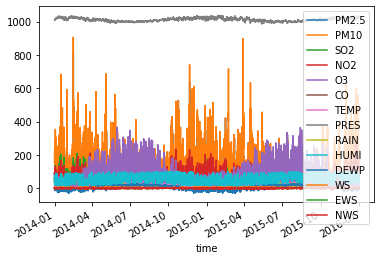

In [18]:
data.plot()

In [19]:
data.to_csv('./Data/datafull.csv')

In [20]:
df1 = data['PM2.5']

<AxesSubplot:xlabel='time'>

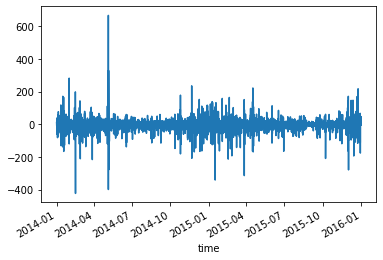

In [21]:
df1.diff().dropna().plot() 

array([<AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>],
      dtype=object)

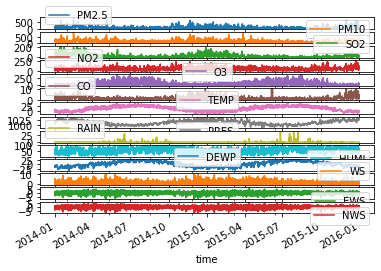

In [22]:
data.plot(subplots = True)

In [48]:
df = pd.DataFrame(data[['PM2.5']])

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import os
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import Dataset, DataLoader

In [50]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from torch.autograd import Variable
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length),:]
        _y = [data[i+seq_length,0]]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

sc = StandardScaler()
sc.fit(df)
training_data = sc.transform(df)
#training_data = sc.fit_transform(df)

seq_length = 24
x, y = sliding_windows(training_data, seq_length)

train_size = int(len(y) * 0.75)
test_size = len(y) - train_size

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

In [44]:
class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        
        h_out = h_out.view(-1, self.hidden_size)
        
        out = self.fc(h_out)
        
        return out

In [51]:
num_epochs = 1000
learning_rate = 0.001

input_size = 1
hidden_size = 20
num_layers = 1

num_classes = 1

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = lstm(trainX)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, trainY)
    
    loss.backward()
    
    optimizer.step()
    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.84879
Epoch: 100, loss: 0.21958
Epoch: 200, loss: 0.10639
Epoch: 300, loss: 0.07970
Epoch: 400, loss: 0.06814
Epoch: 500, loss: 0.06247
Epoch: 600, loss: 0.05995
Epoch: 700, loss: 0.05889
Epoch: 800, loss: 0.05829
Epoch: 900, loss: 0.05783


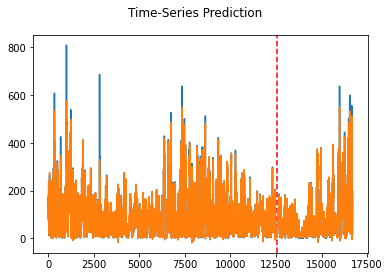

In [52]:
lstm.eval()
train_predict = lstm(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

#data_predict = data_predict*(sc.data_max_[0]-sc.data_min_[0])+sc.data_min_[0]
#dataY_plot = dataY*(sc.data_max_[0]-sc.data_min_[0])+sc.data_min_[0]
data_predict = data_predict*sc.scale_[0]+sc.mean_[0]
dataY_plot = dataY*sc.scale_[0]+sc.mean_[0]

#data_predict = sc.inverse_transform(data_predict)
#dataY_plot = sc.inverse_transform(dataY_plot)

plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot)
plt.plot(data_predict)
plt.suptitle('Time-Series Prediction')
plt.show()

array([<AxesSubplot:xlabel='time'>], dtype=object)

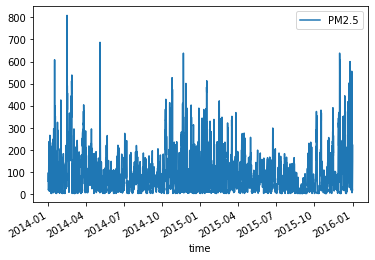

In [53]:
df.plot(subplots = True)

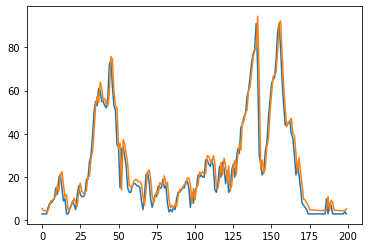

In [54]:
plt.plot(dataY_plot[14000:14200])
plt.plot(data_predict[14000:14200])

In [55]:
from sklearn import metrics


In [56]:
metrics.mean_squared_error(dataY_plot,data_predict)**0.5

20.659782903957918